In [1]:
## Image classification

## data loading
import torch

from torchvision.datasets import CIFAR10

from keras.datasets import cifar10

from matplotlib import pyplot

In [2]:
train_data = CIFAR10(root='./data', train=True, download=True)

100%|██████████| 170M/170M [00:01<00:00, 90.8MB/s]


In [3]:
## load dataset

(trainX, trainY), (testX, testY) = cifar10.load_data()

print("Train: X = %s, y =%s" % (trainX.shape, trainY.shape))

print("Test: X = %s, y =%s" % (testX.shape, testY.shape))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Train: X = (50000, 32, 32, 3), y =(50000, 1)
Test: X = (10000, 32, 32, 3), y =(10000, 1)


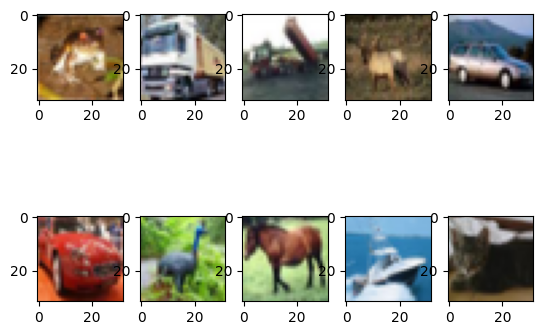

In [4]:
## lets check few images
for i in range(10):

  pyplot.subplot(2,5, i+1)

  pyplot.imshow(trainX[i])

pyplot.show()

In [5]:
train_data.data.shape

(50000, 32, 32, 3)

In [6]:
train_data.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [7]:
j=0
for j in range(10):

  data, label = train_data[j]

  print("Picture 1" + str(j+1)+ ", photo:", train_data.classes[label])

Picture 11, photo: frog
Picture 12, photo: truck
Picture 13, photo: truck
Picture 14, photo: deer
Picture 15, photo: automobile
Picture 16, photo: automobile
Picture 17, photo: bird
Picture 18, photo: horse
Picture 19, photo: ship
Picture 110, photo: cat


In [8]:
## data transforms

from torchvision import transforms
from torch.utils.data import DataLoader

train_data_path ="./train/"
test_data_path = "./test/"

train_transforms = transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])



In [9]:
training_data = CIFAR10(root='./data', train=True, download=True, transform=train_transforms)

In [10]:
test_transforms = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize(
                                          mean=[0.485, 0.456, 0.406],
                                          std=[0.229, 0.224, 0.225]
                                      )])


test_data = CIFAR10(root='./data', train=False, download=True, transform=test_transforms)



In [11]:
batch_size = 16
training_data_loader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_data_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [13]:
## model development and training
import torch
from torchvision.datasets import CIFAR10

from torch.utils.data import DataLoader
from torchvision import models
from torch import optim

import torch.nn as nn